In [1]:
import pandas as pd
import matplotlib
%matplotlib inline
import train_utils

ModuleNotFoundError: No module named 'torch'

In [2]:
n_output = 4
n_epochs = 256
batch_size = 64
lr_init = 0.01
n_input = 7
n_hidden = 4
seed = 42

In [3]:
# 训练数据归一化
train_utils.scale_train_dataset()

In [4]:
# 训练模型
model = train_utils.train_a_model(n_input, n_output, n_hidden, n_epochs, batch_size, lr_init, seed)

n_input=7, n_output=4, n_hidden=4


  0%|          | 0/256 [00:00<?, ?it/s]

epoch 0	mean loss: 0.10305120320874955	current learning rate: 0.01
epoch 7	mean loss: 0.01227051375335822	current learning rate: 0.009726562500000004
epoch 15	mean loss: 0.01136698016939253	current learning rate: 0.009414062500000006
epoch 23	mean loss: 0.01061882514877886	current learning rate: 0.00910156250000001
epoch 31	mean loss: 0.009682055348181336	current learning rate: 0.00878906250000001
epoch 39	mean loss: 0.009073704145832435	current learning rate: 0.008476562500000014
epoch 47	mean loss: 0.008616382469942882	current learning rate: 0.008164062500000015
epoch 55	mean loss: 0.008753859641713702	current learning rate: 0.007851562500000013
epoch 63	mean loss: 0.008143635316952346	current learning rate: 0.007539062500000014
epoch 71	mean loss: 0.007837698425964237	current learning rate: 0.0072265625000000125
epoch 79	mean loss: 0.008119476986882163	current learning rate: 0.006914062500000012
epoch 87	mean loss: 0.007914543320107277	current learning rate: 0.006601562500000012
epo

In [5]:
# 保存模型，可跳过
train_utils.save_model(model, n_input, n_hidden, seed)

In [1]:
import numpy as np
np.linspace(0, 1, num=3)

array([0. , 0.5, 1. ])

---

In [3]:
import predict_utils

In [4]:
# 载入模型，可跳过
model = predict_utils.load_model(n_input, n_output, n_hidden, seed)

In [5]:
print(f'模型参数总数：{sum(p.numel() for p in model.parameters() if p.requires_grad)}')

模型参数总数：274


In [6]:
# 预测数据预处理
predict_utils.scale_predict_dataset()

  0%|          | 0/4 [00:00<?, ?it/s]

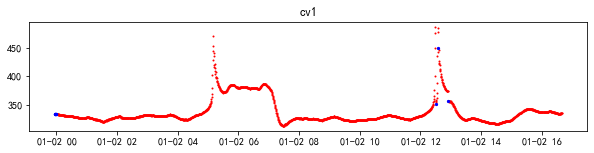

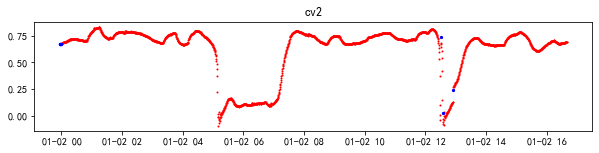

  0%|          | 0/5 [00:00<?, ?it/s]

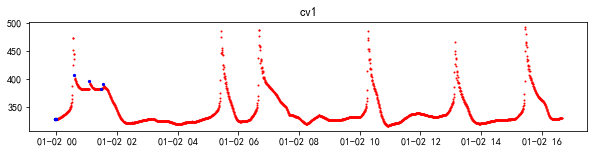

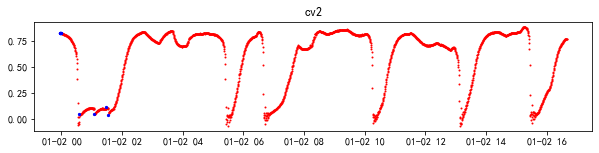

  0%|          | 0/4 [00:00<?, ?it/s]

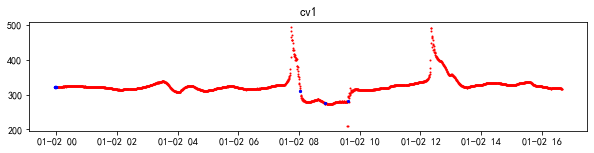

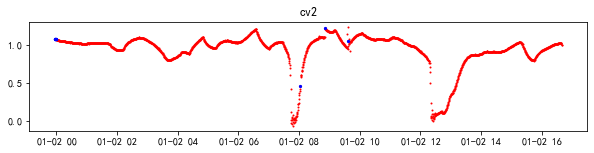

In [7]:
# 对三组数据分别预测
submit = []
for i in range(3):
    submit.append(predict_utils.predict(pd.read_pickle(f'tmp/predict_B_{i}.pkl'), model, n_input, filename=f'{i}'))

In [11]:
# 将三个预测结果拼起来
submit = pd.concat([df.tail(2002) for df in submit])
submit

,time,dv1,dv2,mv1,cv1,cv2
6,2023-01-01 23:59:30,0.90,352.00,305.00,333.990000,0.670000
7,2023-01-02 00:00:00,0.93,351.62,305.36,333.303215,0.675813
8,2023-01-02 00:00:30,0.93,352.09,305.33,333.596645,0.676121
9,2023-01-02 00:01:00,0.92,351.15,304.26,333.633654,0.677721
10,2023-01-02 00:01:30,0.89,352.26,304.79,333.369695,0.678512
...,...,...,...,...,...,...
2003,2023-01-02 16:38:00,1.01,344.87,293.46,317.241419,1.026974
2004,2023-01-02 16:38:30,1.02,345.07,292.85,317.086552,1.023936
2005,2023-01-02 16:39:00,1.04,345.31,293.79,317.071697,1.015182
2006,2023-01-02 16:39:30,1.04,344.47,293.49,317.202411,1.009549


In [12]:
# 保存结果
submit[['cv1', 'cv2']].to_csv(f'submit/predict_{n_input}_{n_hidden}_{seed}.csv', index=False)